<a href="https://colab.research.google.com/github/ankitbittu/Telecom-Churn-Analysis/blob/main/Copy_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Almabetter/Capstone project 1/Copy of Telecom Churn.csv'
telecom_df=pd.read_csv(file_path)

In [ ]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
telecom_df.shape

(3333, 20)

In [ ]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
telecom_df.describe

<bound method NDFrame.describe of      State  Account length  ...  Customer service calls  Churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
3328    AZ             192  ...                       2  False
3329    WV              68  ...                       3  False
3330    RI              28  ...                       2  False
3331    CT             184  ...                       2  False
3332    TN              74  ...                       0  False

[3333 rows x 20 columns]>

In [ ]:
telecom_df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
telecom_df.groupby('Churn').agg({'Churn' : 'count'}).rename(columns = {'Churn':'Number of customers'})

,Number of customers
Churn,
False,2850
True,483


In [ ]:
telecom_df.groupby('Voice mail plan').agg({'Voice mail plan' : 'count'})

,Voice mail plan
Voice mail plan,
No,2411
Yes,922


In [ ]:
churn_statewise_df = telecom_df.groupby(['State', 'Churn'])['Churn'].value_counts()
x = pd.DataFrame(churn_statewise_df)

In [ ]:
x

Churn
State Churn       
AK    False     49
      True       3
AL    False     72
      True       8
AR    False     44
...            ...
WI    True       7
WV    False     96
      True      10
WY    False     68
      True       9

[102 rows x 1 columns]

In [ ]:
telecom_df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: Churn, dtype: int64

In [ ]:

corr_df = telecom_df.corr()

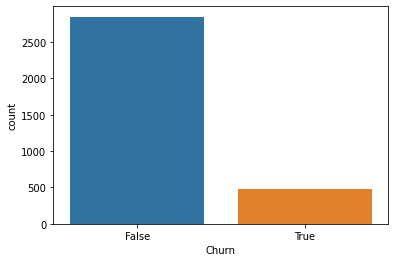

In [ ]:
sb.countplot(x='Churn', data = telecom_df)

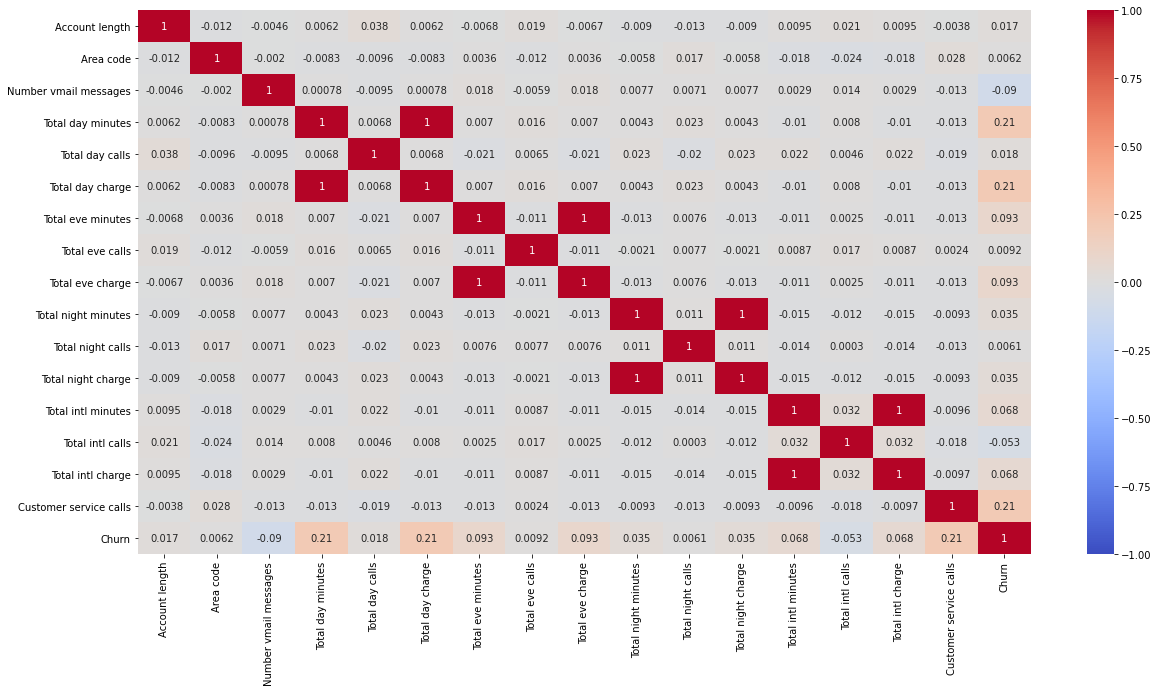

In [ ]:
plt.figure(figsize=(20,10))
sb.heatmap(corr_df, vmin = -1, cmap = 'coolwarm', annot = True)

In [ ]:
numerical = list(set(telecom_df.columns)-set(['State', 'International plan', 'Voice mail plan',
                                     'Area code', 'Churn', 'Customer service calls']))
corr_matrix = telecom_df[numerical].corr()
corr_matrix

,Total intl charge,Account length,Total eve calls,Total day charge,Total night calls,Total night minutes,Total intl calls,Number vmail messages,Total intl minutes,Total night charge,Total eve minutes,Total day minutes,Total day calls,Total eve charge
Total intl charge,1.000000,0.009546,0.008674,-0.010094,-0.013630,-0.015180,0.032372,0.002884,0.999993,-0.015186,-0.011067,-0.010092,0.021666,-0.011074
Account length,0.009546,1.000000,0.019260,0.006214,-0.013176,-0.008955,0.020661,-0.004628,0.009514,-0.008960,-0.006757,0.006216,0.038470,-0.006745
Total eve calls,0.008674,0.019260,1.000000,0.015769,0.007710,-0.002093,0.017434,-0.005864,0.008703,-0.002056,-0.011430,0.015769,0.006462,-0.011423
Total day charge,-0.010094,0.006214,0.015769,1.000000,0.022972,0.004324,0.008032,0.000776,-0.010157,0.004301,0.007050,1.000000,0.006753,0.007036
Total night calls,-0.013630,-0.013176,0.007710,0.022972,1.000000,0.011204,0.000305,0.007123,-0.013605,0.011188,0.007586,0.022972,-0.019557,0.007596
Total night minutes,-0.015180,-0.008955,-0.002093,0.004324,0.011204,1.000000,-0.012353,0.007681,-0.015207,0.999999,-0.012584,0.004323,0.022938,-0.012592
Total intl calls,0.032372,0.020661,0.017434,0.008032,0.000305,-0.012353,1.000000,0.013957,0.032304,-0.012329,0.002541,0.008033,0.004574,0.002541
Number vmail messages,0.002884,-0.004628,-0.005864,0.000776,0.007123,0.007681,0.013957,1.000000,0.002856,0.007663,0.017562,0.000778,-0.009548,0.017578
Total intl minutes,0.999993,0.009514,0.008703,-0.010157,-0.013605,-0.015207,0.032304,0.002856,1.000000,-0.015214,-0.011035,-0.010155,0.021565,-0.011043
Total night charge,-0.015186,-0.008960,-0.002056,0.004301,0.011188,0.999999,-0.012329,0.007663,-0.015214,1.000000,-0.012593,0.004300,0.022927,-0.012601


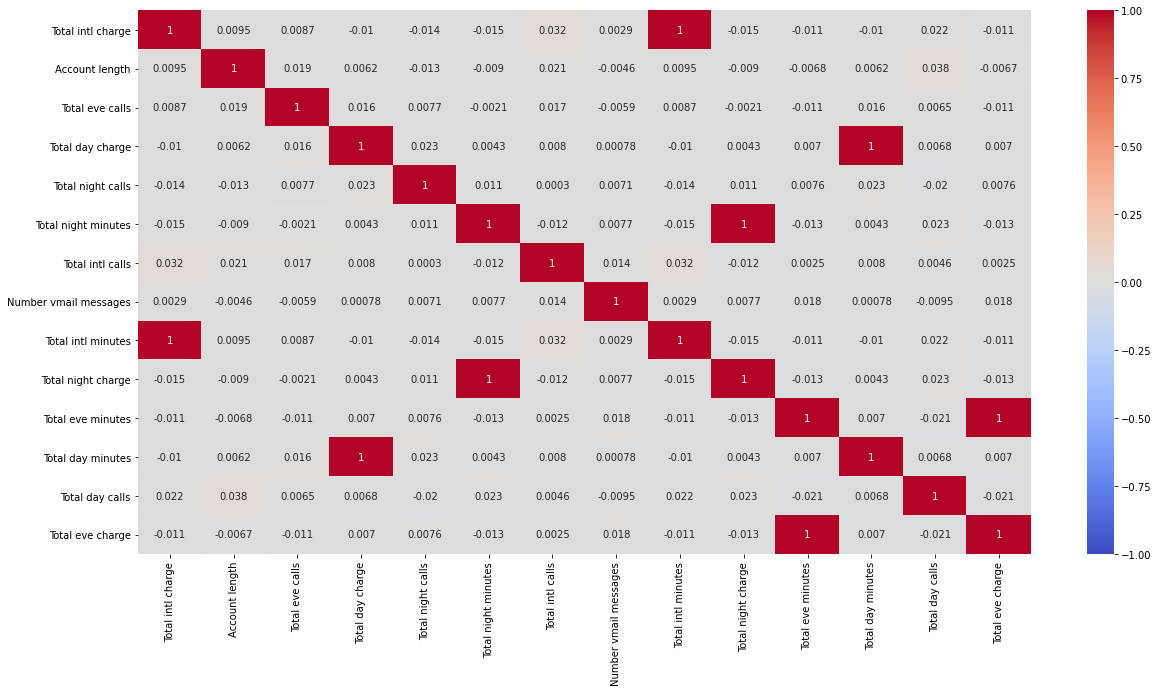

In [ ]:
numerical = list(set(numerical)-set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))
corr_matrix = telecom_df[numerical].corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr_matrix, vmin = -1, cmap = 'coolwarm', annot = True);

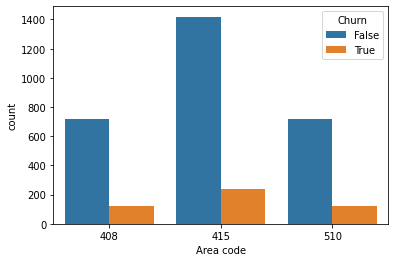

In [ ]:
sb.countplot(data = telecom_df, x = 'Area code', hue = 'Churn')

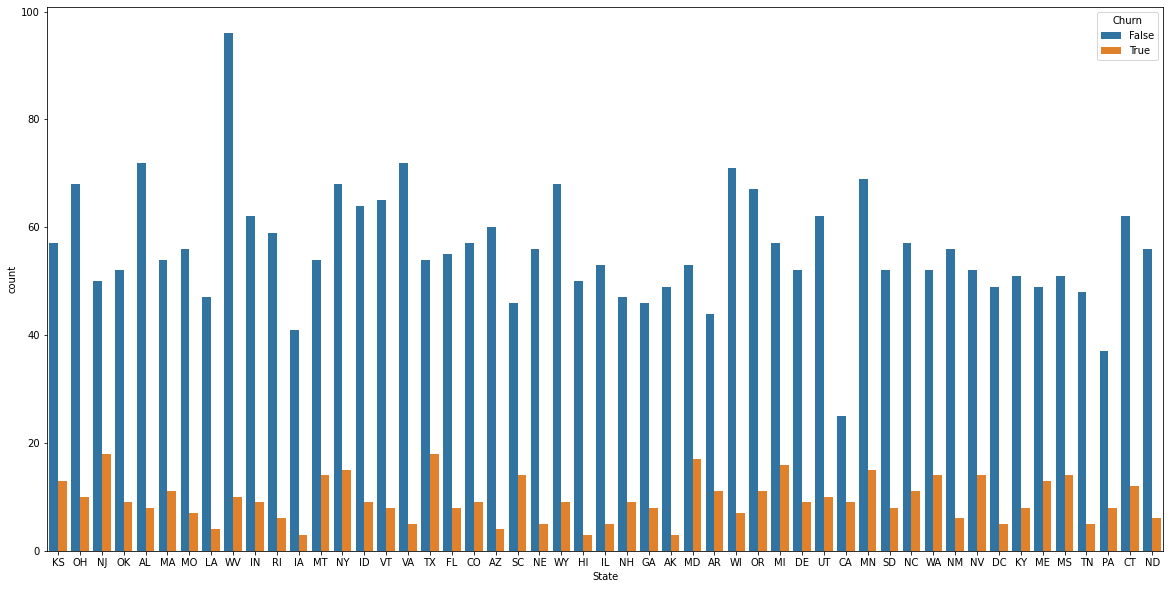

In [ ]:
plt.figure(figsize=(20,10))
sb.countplot(data = telecom_df, x = 'State', hue = 'Churn')

In [ ]:
Area_wise_state_df = telecom_df.groupby(['State','Area code'])['Churn'].value_counts()
Area_wise_state_df

State  Area code  Churn
AK     408        False    14
       415        False    21
                  True      3
       510        False    14
AL     408        False    21
                           ..
WY     408        False    17
       415        False    36
                  True      5
       510        False    15
                  True      4
Name: Churn, Length: 292, dtype: int64

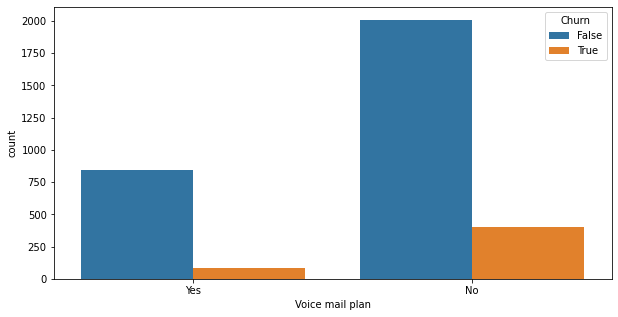

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(x='Voice mail plan', hue='Churn', data=telecom_df);

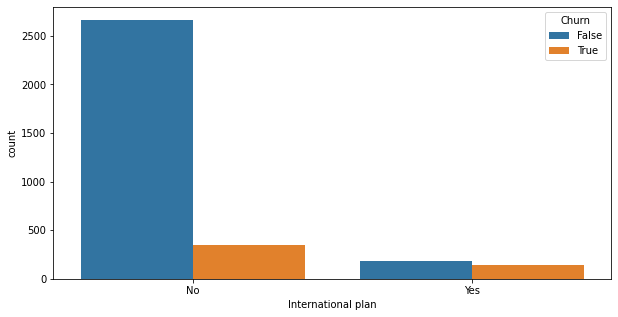

In [ ]:
plt.figure(figsize=(10,5))
plot = sb.countplot(x='International plan', hue='Churn', data=telecom_df)



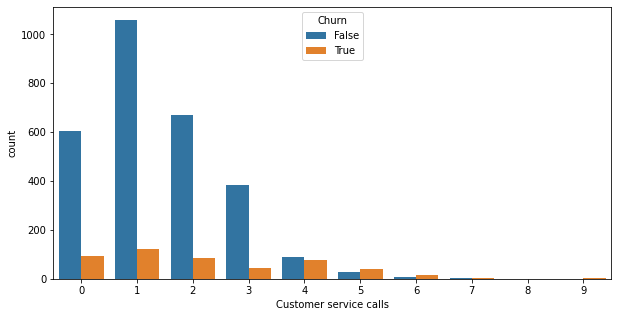

In [ ]:
plt.figure(figsize=(10,5))
sb.countplot(x='Customer service calls', hue='Churn', data=telecom_df);

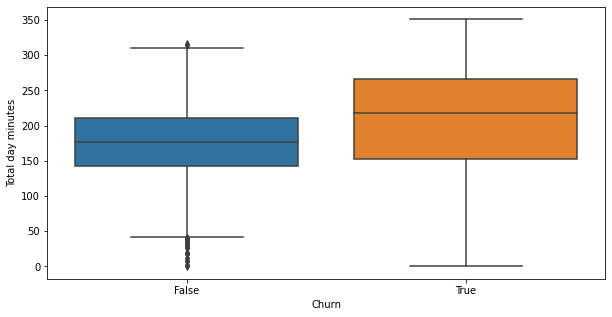

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total day minutes', x='Churn', data=telecom_df);

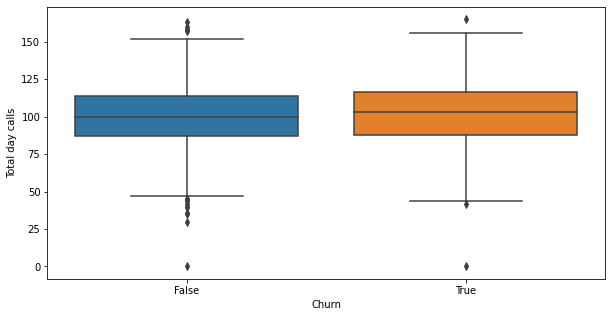

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total day calls', x='Churn', data=telecom_df);

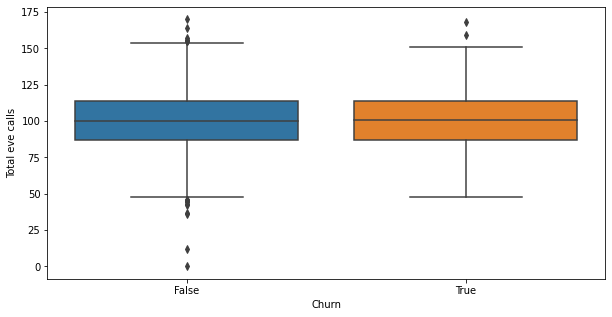

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total eve calls', x='Churn', data=telecom_df);

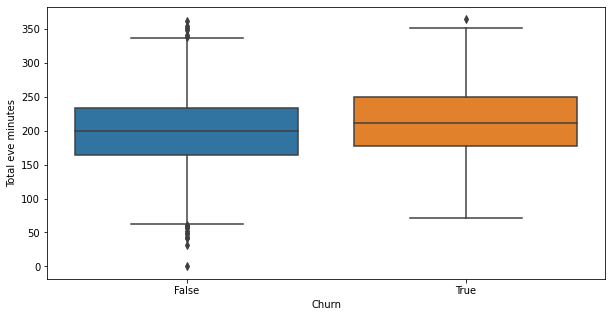

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total eve minutes', x='Churn', data=telecom_df);

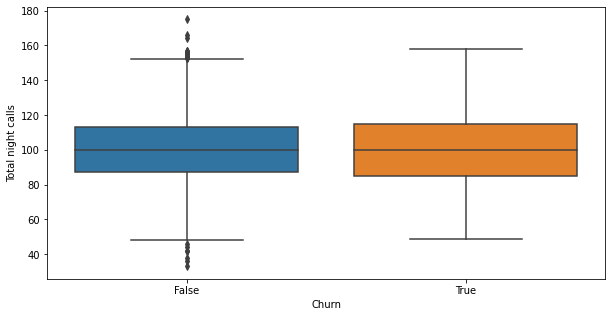

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total night calls', x='Churn', data=telecom_df);

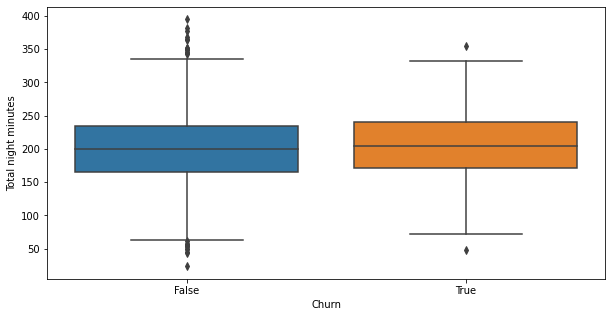

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total night minutes', x='Churn', data=telecom_df);

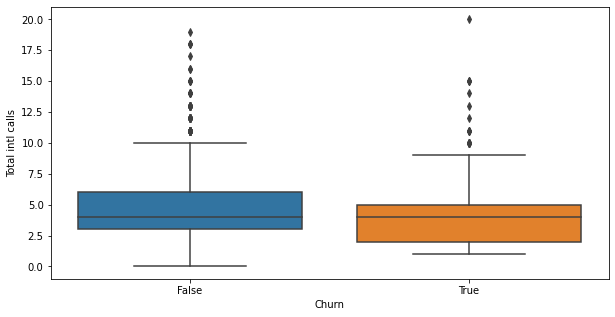

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Total intl calls', x='Churn', data=telecom_df);

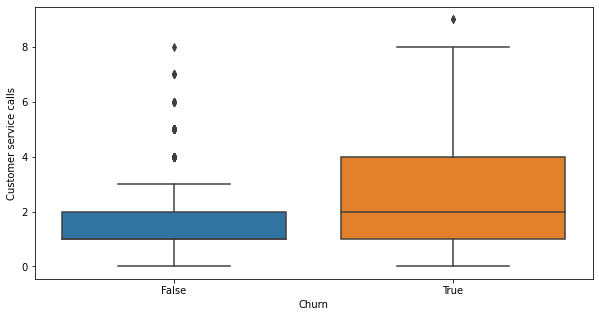

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Customer service calls', x='Churn', data=telecom_df);

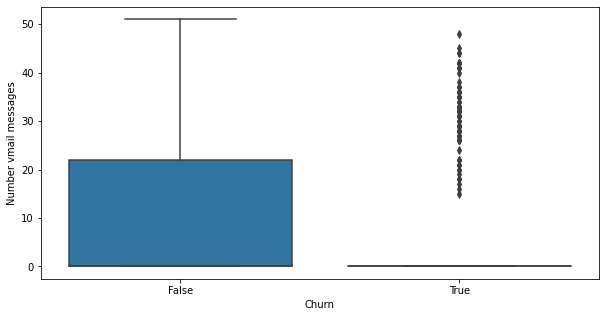

In [ ]:
plt.figure(figsize=(10,5))
sb.boxplot(y='Number vmail messages', x='Churn', data=telecom_df);

In [ ]:
telecom_df.groupby('Churn').agg({'Customer service calls':np.mean})

,Customer service calls
Churn,
False,1.449825
True,2.229814


In [ ]:
pd.crosstab(telecom_df['State'], telecom_df['Churn'], margins=True)

Churn,False,True,All
State,,,
AK,49,3,52
AL,72,8,80
AR,44,11,55
AZ,60,4,64
CA,25,9,34
CO,57,9,66
CT,62,12,74
DC,49,5,54
DE,52,9,61


In [ ]:
telecom_df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by = 'mean', ascending=False).rename(columns = {'mean':'churn_rate'})

,churn_rate
State,
NJ,0.264706
CA,0.264706
TX,0.250000
MD,0.242857
SC,0.233333
MI,0.219178
MS,0.215385
NV,0.212121
WA,0.212121


In [ ]:
pd.crosstab(telecom_df["Customer service calls"], telecom_df["Churn"])

Churn,False,True
Customer service calls,,
0,605,92
1,1059,122
2,672,87
3,385,44
4,90,76
5,26,40
6,8,14
7,4,5
8,1,1


In [ ]:
telecom_df.groupby(['Customer service calls'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

,churn_rate
Customer service calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


In [ ]:
pd.crosstab(telecom_df["International plan"], telecom_df["Churn"])


Churn,False,True
International plan,,
No,2664,346
Yes,186,137


In [ ]:
telecom_df.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})

,churn_rate
International plan,
No,0.114950
Yes,0.424149


In [ ]:
telecom_df['Customer_calls_beyond_3'] = (telecom_df['Customer service calls'] > 3)

In [ ]:
telecom_df.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total day charge per min,Total intl charge per min,Customer_calls_beyond_3
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True,0.170017,0.269853,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False,0.170024,0.269828,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False,0.170010,0.269892,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False,0.169981,0.269799,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False,0.170007,0.270339,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0.169974,0.269697,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0.170013,0.269792,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0.170022,0.270213,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0.170019,0.270000,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False,0.170009,0.270073,False


In [ ]:
pd.crosstab(telecom_df["Customer_calls_beyond_3"] & telecom_df["International plan"], telecom_df["Churn"])

Churn,False,True
row_0,,
False,2841,464
True,9,19


In [ ]:
telecom_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total day charge per min,Total intl charge per min,Customer_calls_beyond_3,Total eve charge per min,Total night charge per min,account_active_months
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0.170011,0.270000,False,0.085005,0.044994,4.266667
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0.169988,0.270073,False,0.085013,0.045008,3.566667
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0.170008,0.269672,False,0.084983,0.045018,4.566667
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0.170007,0.269697,False,0.084976,0.044997,2.800000
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0.170006,0.270297,False,0.085030,0.044997,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,0.169974,0.269697,False,0.085012,0.045002,6.400000
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,0.170013,0.269792,False,0.085007,0.045008,2.266667
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,0.170022,0.270213,False,0.085007,0.045023,0.933333
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0.170019,0.270000,False,0.085025,0.044971,6.133333


In [ ]:
telecom_df.groupby([ 'Voice mail plan', 'International plan', 'Customer_calls_beyond_3','Churn']).agg({'Churn':'count','Customer service calls': np.mean})

Churn  Customer service calls
Voice mail plan International plan Customer_calls_beyond_3 Churn                               
No              No                 False                   False   1796                1.332405
                                                           True     207                1.265700
                                   True                    False     82                4.390244
                                                           True      95                4.736842
                Yes                False                   False    125                1.280000
                                                           True      88                1.170455
                                   True                    False      5                4.000000
                                                           True      13                4.230769
Yes             No                 False                   False    748                1.267380
                                                           True      20                1.650000
                                   True                    False     38                4.684211
                                                           True      24                4.666667
                Yes                False                   False     52                1.096154
                                                           True      30                1.000000
                                   True                    False      4                4.000000
                                                           True       6                5.333333

In [ ]:
changes = {'No': 0,'Yes': 1}

telecom_df['Voice mail plan'] = telecom_df['Voice mail plan'].map(changes)
telecom_df['International plan'] = telecom_df['International plan'].map(changes)

In [ ]:
telecom_df.groupby('State').agg({'Area code':'count', 'Voice mail plan':np.,'International plan':np.sum, 'Customer_calls_beyond_3':np.sum, 'Churn':np.sum})

,Area code,Voice mail plan,International plan,Customer_calls_beyond_3,Churn
State,,,,,
AK,52,0.0,0.0,3,3
AL,80,0.0,0.0,6,8
AR,55,0.0,0.0,8,11
AZ,64,0.0,0.0,7,4
CA,34,0.0,0.0,5,9
CO,66,0.0,0.0,9,9
CT,74,0.0,0.0,5,12
DC,54,0.0,0.0,3,5
DE,61,0.0,0.0,5,9
